<a href="https://colab.research.google.com/github/Binho-do-Boa/Atividades_UFMT/blob/main/Redes_Convolucionais_Keras_Cifar10_Accuracy_73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Carregamento e preparação da base de dados
cifar = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Data Augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [6]:
# Criação do modelo
model = keras.models.Sequential([
  keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Dropout(0.3),

  keras.layers.Conv2D(128, (3, 3), activation='relu'),
  keras.layers.Conv2D(128, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D(2,2),
  keras.layers.Dropout(0.4),

  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,082,186 (4.13 MB)

 Trainable params: 1,082,186 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Treinamento e validação
epochs = 50
batch_size = 64

# Treinamento com data augmentation
hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                 validation_data=(x_test, y_test),
                 epochs=epochs,
                 steps_per_epoch=x_train.shape[0] // batch_size,
                 callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)])

Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.2088 - loss: 2.0882 - val_accuracy: 0.4286 - val_loss: 1.5590
Epoch 2/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3906 - loss: 1.6391 - val_accuracy: 0.4313 - val_loss: 1.5577
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.3842 - loss: 1.6567 - val_accuracy: 0.4790 - val_loss: 1.4503
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4688 - loss: 1.4217 - val_accuracy: 0.4823 - val_loss: 1.4488
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.4416 - loss: 1.5295 - val_accuracy: 0.5035 - val_loss: 1.3665
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.5625 - loss: 1.5050 - val_accuracy: 0.5027 - val_loss: 1.3695
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.4755 - loss: 1.4462 - val_accuracy: 0.5302 - val_loss: 1.3178
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - accuracy: 0.5000 - loss: 1.4119 - val_

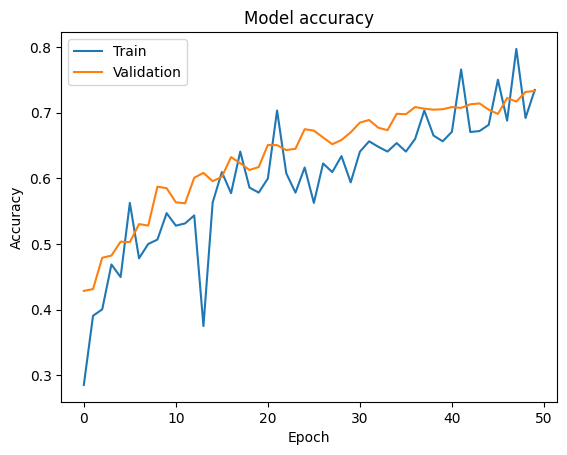

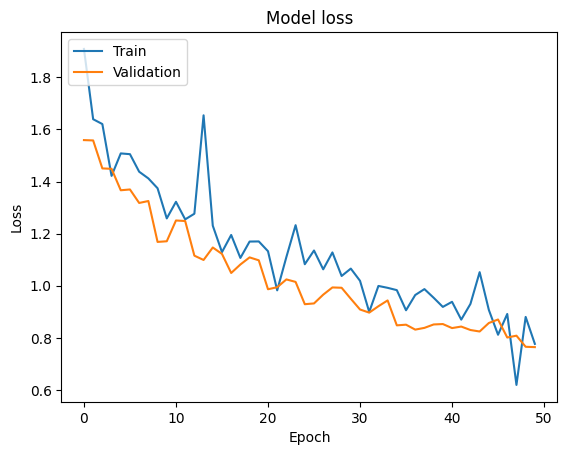

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7421 - loss: 0.7496
Test loss: 0.7644219398498535, Test accuracy: 73.29000234603882


In [8]:
# Plot Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy * 100))